<center>

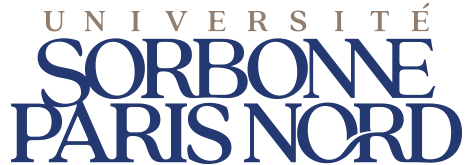

</center>

<h1><center><strong style="color: #293358">NoSQL<br/> BUT 3 - IUT Villetaneuse <br/> MongoDB plus en détails</strong></center></h1>

<center>
<h3 style="color: #8b7d6d"><a href="https://gguibon.github.io/">Gaël Guibon</a></h3>
<email>gael.guibon@sorbonne-paris-nord.fr</email>
<br/>
Year 2025-2026

Original Content

Licenced under Affero GNU3
</center>

## <strong style="color: #8b7d6d">Usage de la machine virtuelle</strong>

1. Téléchargez la VM ici : https://e.pcloud.link/publink/show?code=XZ3dvxZh0fEzIaCmqF9HHRP346u0S0MY4lk
2. Importez la dans Virtual Box
3. Connectez-vous avec l'id `uspn`et le mot de passe `uspn`
4. Enjoy !


Cette machine virtuelle est déjà configurée pour Redis et il vous suffit de lancer les quelques commandes de la section suivante pour y installer MongoDB.

## <strong style="color: #8b7d6d">Installation de mongodb</strong>

### Ubuntu 24.04 LTS

L'installation de mongodb, de pymongo et de mongo compass est déjà faite dans la VM 😉

À toute fin utile, voici les commandes pour l'installation sous Ubuntu :

In [ ]:
! sudo apt update ; sudo apt-get install gnupg curl
! curl -fsSL https://www.mongodb.org/static/pgp/server-8.0.asc | sudo gpg -o /usr/share/keyrings/mongodb-server-8.0.gpg --dearmor
! echo "deb [ arch=amd64,arm64 signed-by=/usr/share/keyrings/mongodb-server-8.0.gpg ] https://repo.mongodb.org/apt/ubuntu noble/mongodb-org/8.0 multiverse" | sudo tee /etc/apt/sources.list.d/mongodb-org-8.0.list
! sudo apt update ; sudo apt-get install -y mongodb-org wget

In [ ]:
! pip install pymongo pandas --break-system-packages

In [ ]:
! wget https://downloads.mongodb.com/compass/mongodb-compass_1.44.4_amd64.deb
! sudo apt install ./mongodb-compass_1.44.4_amd64.deb

In [ ]:
! wget https://gitlab.com/gguibon/uspn-storage/-/raw/main/pokemons.json

### Windows / MacOS

1. Téléchargez MongoDB Community Edition : https://www.mongodb.com/try/download/community
2. Installez le en mettant tout par défaut
3. Téléchargez Mongo Compass : https://www.mongodb.com/products/tools/compass 
4. Installez le.
5. Installez `pandas`, `pymongo` et `wget` : 

In [ ]:
! pip install pymongo pandas wget

6. Téléchargez la base des pokemons : 

In [1]:
import wget
url = "https://gitlab.com/gguibon/uspn-storage/-/raw/main/pokemons.json"
wget.download(url)

'pokemons.json'

## <strong style="color: #8b7d6d">Lancement du service Mongodb (`mongod`)</strong>

### Ubuntu 24.04 LTS

In [ ]:
! sudo service mongod start
! sudo service mongod status

### Windows 10 / 11

Lancez une invite de commande (ou un Windows Terminal) en administrateur, puis exécutez :

```sh
net start MongoDB
```

# <strong style="color: #8b7d6d">Commande directe à la base de données</strong>

#### 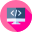 **TODO!**

MongoDB est *uniquement* une base données. Vous ne pouvez donc pas vraiment y mettre une logique complète car il ne s'agit pas d'un langage de programmation mais d'un langage de requête et de manipulation de la base de données fourni avec celle-ci. 


Mais alors, à quoi ressemble MongoDB réellement ? Est-ce utile d'apprendre les commandes natives de MongoDB ? Oui. Oui !! 😁

C'est ce que nous allons voir immédiatement. Pour ce faire, plusieurs solutions : ouvrir `mongosh` dans un terminal ou ouvrir la ligne de commande dans MongoDB Compass... Nous sommes en info ici, vous n'allez tout de même pas utiliser une interface graphique pour manipuler vos données n'est-ce pas ?

Etapes à suivre (difficulté supplémentaire => interdiction d'utiliser la souris durant toute cette section sur mongosh ! 😈) :
1. Ouvrir un terminal (CTRL + ALT + T sous linux ; WIN puis "ter" puis ENTRER sous Windows ; CMD + SPACE puis "ter" puis ENTRER sous Mac)
2. Taper `mongosh`  (Vous n'avez pas `mongosh` sous Windows ? Allez ici : https://www.mongodb.com/try/download/shell et téléchargez puis exécutez le fichier .msi). Si vous utilisez docker : `docker exec -it mongodb mongosh`
3. Ouvrir / accéder au navigateur internet (sans souris hein!!!), puis CTRL/CMD + T pour ouvrir un nouvel onglet puis CTRL/CMD + L pour accéder à la barre d'adresse et collez l'URL de la documentation : https://www.mongodb.com/docs/mongodb-shell/

<img src="./mongosh.png" height="300px" />

#### 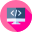 **TODO!**

Connectez-vous à la base de données `but3` (créée dans le TD précédent).

Astuces :
- afficher les bases de données : `show dbs`
- voir la base de données actuellement sélectionnée : `db`
- choisir d'utiliser une base de données : `use [nom_de_la_base_de_donnees]`
- utilisez la documentation dédiée pour les commandes à venir : https://www.mongodb.com/docs/mongodb-shell/run-commands/

In [2]:
from pymongo import MongoClient

client = MongoClient("mongodb://localhost:27017/")

db = client["but3"]

collection = db["pokemons"]

In [ ]:
# ceci est une cellule shell et non python. Evidemment, cela doit être entré dans mongosh... Mais vous trouverez donc ici la correction 😉
use but3

#### 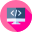 **TODO!**

Récupérez tous les pokemons de la collection `pokemons`.

In [3]:
db.pokemons.find({}, {})


#### 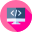 **TODO!**

Toujours à l'aide de `mongosh`, trouvez quel est le pokemon numéro 54, en le récupérant, et uniquement cet élément.

In [5]:
db.pokemons.find( {Number : 54})   

NameError: name 'name' is not defined

Et oui, il s'agit bien de Psyduck (Psykokwak en français).

<img src="https://www.pokepedia.fr/images/thumb/4/44/Psykokwak-RFVF.png/250px-Psykokwak-RFVF.png" height="200px" />

#### 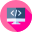 **TODO!**

Maintenant, récupérez uniquement son nom.

In [ ]:
db.pokemons.find({Number : 54} , {_id : 0 , Name : 1 })

#### 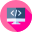 **TODO!**

Récupérez les noms et types des pokemons de première génération ayant une force d'au moins 120.

Astuces :
- deux opérateurs sont possibles : "plus grand que" ou "plus grand ou égal à"

In [1]:
db.pokemons.find({Generation : 1 , Attack : {$gte : 120}} , {_id : 0 , Name : 1 , Type_1 : 1})

SyntaxError: invalid syntax (1590681537.py, line 1)

#### 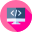 **TODO!**

Parmis ces pokemons, récupérez uniquement ceux qui sont <span style="color:green;">verts</span> ou <span style="color: blue;">bleus</span> et affichez en plus la couleur des pokemons retournés.

In [ ]:
db.pokemons.find({Generation : 1 , Attack : {$gte : 120} , Color : { $in: ["Green" , "Blue"]}} , {_id : 0 , Name : 1 , Type_1 : 1 , Color : 1})

#### 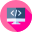 **TODO!**

Récupérez les pokemons dont le type principal est le feu et dont le second type n'est pas nul.

Astuces :
- jetez un oeil à la référence magique : la DOCUMENTATION détaillée : https://www.mongodb.com/docs/manual/reference/

In [ ]:
db.pokemons.find({Type_1 : "Fire" , Type_2 : {$ne : null}} , {_id : 0 , Name : 1 , Type_1 : 1 , Type_2 : 1})

#### 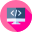 **TODO!**

Récupérez les noms, la génération et le statut légendaire et la présence de méga evolution de tous les pokémons légendaires ou ayant une Méga Evolution.

In [ ]:
db.pokemons.find(
  { $or: [ { isLegendary: true }, { hasMegaEvolution: true } ] },
  { _id: 0, Name: 1, Generation: 1, isLegendary: 1, hasMegaEvolution: 1 }
)

#### 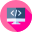 **TODO!**

Récupérez le pokémon le plus choupi (Carapuce) et modifiez son attaque à plus de 9000. Insérez en même temps la date de dernière modification de cet élément.

<img src="https://i.kym-cdn.com/entries/icons/mobile/000/000/056/itsover1000.jpg" height="100px" />

Astuces : 
- https://www.mongodb.com/docs/mongodb-shell/crud/update/

In [ ]:
db.pokemons.updateOne({ Name : "Squirtle" }, { $set: { Attack: 9001, lastModified: new Date() } })

#### 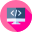 **TODO!**

Affichez désormais le nouvel état de ce pokémon.

In [ ]:
db.pokemons.updateOne({ Name : "Squirtle" }, { $set: { Attack: 9001 }, $currentDate: { lastUpdate: true } })

#### 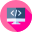 **TODO!**

Marre de l'anglais ? Changez tous pokémons de type "Fire" en type "BOOM".

In [ ]:
db.pokemons.updateMany({Type_1 : "Fire"} , {$set : {Type_1 : "BOOM"}}, {_id : 0 , Name : 1 , Type_1 : 1 }

#### 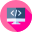 **TODO!**

Affichez désormais le résultat pour ces pokémons.

In [ ]:
db.pokemons.find({Type_1 : "BOOM"} , {_id : 0 , Name : 1 , Type_1 : 1 })

Bien mieux n'est-ce pas ?

<img src="https://media.tenor.com/Hsfpmr_PFIUAAAAe/elmo-fire-elmo.png" height="200px" />

#### 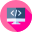 **TODO!**

Insérez un pokémon imaginaire (ou un pokémon plus récent manquant dans la base de données).

In [ ]:
db.pokemons.insert({
    Number: 800,
    Name: "Ultra-Necrozma",
    Type_1: "Psychic",
    Type_2: "Dragon",
    Total: 754,
    HP: 97,
    Attack: 157,
    Defense: 127,
    Sp_Atk: 113,
    Sp_Def: 109,
    Speed: 77,
    Generation: 7,
    isLegendary: true,
    Color: 'Yellow',
    hasGender: false,
    Pr_Male: null,
    Egg_Group_1: 'Undiscovered',
    Egg_Group_2: null,
    hasMegaEvolution: false,
    Height_m: 3.8,
    Weight_kg: 230,
    Catch_Rate: 3,
    Body_Style: 'Humanoid',


})

#### 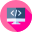 **TODO!**

Supprimez ce nouveau pokémon.

In [ ]:
db.pokemons.deleteOne({ Name : "Ultra-Necrozma" })

#### 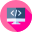 **TODO!**

Ajoutez une liste de compétences ("skills") à votre pokémon favori.

Un skill est représenté par plusieurs valeurs, par exemple : https://www.pokebip.com/pokedex/ecarlate-violet/pokemon/carapuce

Il faut donc ajouter de la hiérarchie à notre pokémon favori.

(profitez en également pour remettre la puissance initiale à ce cher Carapuce 😉)

In [ ]:
db.pokemons.updateOne(
  { Name: "Giratina" },
  { 
    $set: { 
      Attack: 120,  // remettre la valeur initiale (exemple)
      skills: [
        { name: "Shadow Claw", power: 70, type: "Ghost" },
        { name: "Dragon Pulse", power: 90, type: "Dragon" },
        { name: "Aura Sphere", power: 80, type: "Fighting" }
      ]
    },
    $currentDate: { lastModified: true }
  }
)

#### 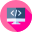 **TODO!**

Affichez de nouveau ce pokemon

In [ ]:
db.pokemons.find({ Name: "Giratina" }, { _id: 0, Name: 1, Attack: 1, skills: 1, lastModified: 1 })

## <strong style="color: #8b7d6d">Les aggregations à but unique</strong>

Les aggrégations sont le fait d'effectuer des requêtes sur plusieurs documents pour en obtenir une nouvelle "vue" (une organisation) ou une donnée aggrégée (la somme par exemple).

De nombreuses commandes sont en fait des aggregations simplifiées car courantes. C'est ce qu'on appelle des aggrégation à but unique, ou, *Single Purpose Aggregation*.

Nous verrons les aggregations en détails par la suite 😉



Commençons par un cas concret : au lieu de récupérer ces pokémons, comptez les tous !

Astuces :
- pour rappel, la **documentation** peut vous donnez des indices sur les commandes : https://www.mongodb.com/docs/manual/reference/command/

#### 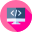 **TODO!**

Combien y a-t-il de pokémons dans la collection ?

In [ ]:
db.pokemons.countDocuments({})

#### 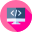 **TODO!**

Combien y a-t-il de pokémons de type eau ?

In [ ]:
db.pokemons.countDocuments({$or: [{ Type_1 : "Water"}, { Type_2 : "Water"}]})

#### 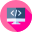 **TODO!**

Retournez les pokémons d'herbe par ordre décroissant : du plus puissant au moins puissant, en affichant uniquement le top 10.

Astuces :
- la puissance est la valeur totale de leurs statistiques 😉
- la commande `order by`est dépréciée, utilisez pllutôt `.sort()`

In [ ]:
db.pokemons.find({ $or: [{ Type_1: "Grass" }, { Type_2: "Grass" }] }, { _id: 0, Name: 1, Total: 1 }).sort({ Total: -1 }).limit(10)


-------